In [3]:
import numpy
import random
from operator import add
import math
import matplotlib.pyplot as plt
import statistics

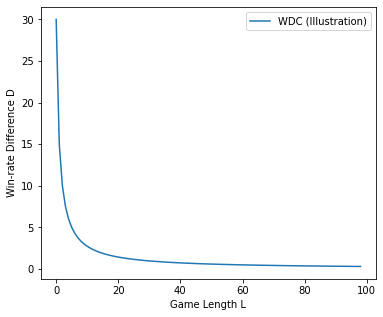

In [14]:
y_axis = [30/i for i in range(1,100)]
x_axis = list(range(len(y_axis)))
# plt.scatter(x_axis,avg_diff, label = "Avg Diff")
plt.plot(x_axis, y_axis, label = "WDC (Illustration)")

plt.rcParams["figure.figsize"] = (6,5)
# plt.suptitle('Round-count vs Win-Rate Diff')
plt.xlabel("Game Length L")
plt.ylabel("Win-rate Difference D")
plt.legend()
plt.show()

In [31]:
a = [[[0,0,0,0]] for _ in range(2000)]
length_of_game = 15000
for i in range(length_of_game):
    for j in range(2000):
        win_idx = random.randint(0,4)
        # construct one hot winner
        oh=[]
        for w in range(4):
            if win_idx==w:
                oh.append(1)
            else:
                oh.append(0)
        a[j].append(oh)
# a: 1000 * length_of_game+1 * 4]
# make list a become cumulative
for i in range(2000):
    for j in range(1,length_of_game+1):
        prev = a[i][j-1]
        cur = a[i][j]
        a[i][j]=list(map(add, prev, cur))

In [36]:
avg_max_diff = []
# std_max_diff = []
max_diff_95 = []
for j in range(10,length_of_game+1):
    max_diff = []
    min_diff = []
    avg_diff = []
    for i in range (2000):
        res = a[i][j]
        res.sort()
        min_dif = 1000
        for i in range(1,4):
            dif = abs(res[i]-res[i-1])
            if dif<min_dif:
                min_dif = dif
        max_dif = 1.0*(max(res)-min(res))/sum(res)*100
        max_diff.append(max_dif)
    avg_max_diff.append(1.0*sum(max_diff)/len(max_diff))
    max_diff.sort()
    max_diff_95.append(max_diff[-100])
    # std_max_diff.append(statistics.stdev(max_diff))

In [32]:
j=10000
max_diff = []
min_diff = []
avg_diff = []
for i in range (2000):
    res = a[i][j]
    res.sort()
    min_dif = 1000
    for i in range(1,4):
        dif = abs(res[i]-res[i-1])
        if dif<min_dif:
            min_dif = dif
    max_dif = 1.0*(max(res)-min(res))/sum(res)*100
    max_diff.append(max_dif)

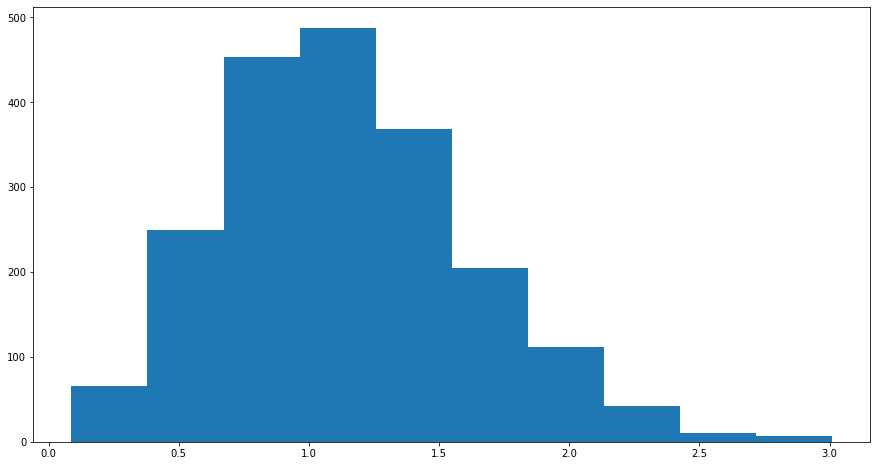

In [33]:
plt.hist(max_diff)
plt.show() 

In [29]:
a = None

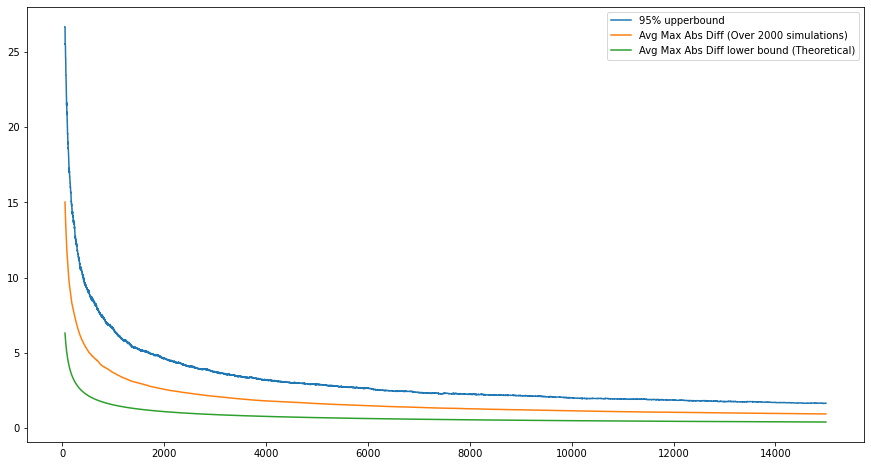

In [37]:
x_axis = list(range(len(avg_max_diff)))
theoretical_bound = [2*(3/(16*i))**0.5/(math.sqrt(math.pi)) /1*100 for i in range(10,len(avg_max_diff)+10)]
# plt.scatter(x_axis,avg_diff, label = "Avg Diff")
plt.plot(x_axis[50:], max_diff_95[50:], label = "95% upperbound")
plt.plot(x_axis[50:], avg_max_diff[50:], label = "Avg Max Abs Diff (Over 2000 simulations)")
# plt.scatter(x_axis,win_rate_diff, label = "Avg Win-rate Diff  (dist>=3)")
plt.plot(x_axis[50:], theoretical_bound[50:], label = "Avg Max Abs Diff lower bound (Theoretical)")
# plt.suptitle('Round-count vs Win-Rate Diff')

plt.rcParams["figure.figsize"] = (15,8)
# plt.suptitle('Round-count vs Win-Rate Diff')
plt.legend()
plt.show()

In [39]:
for i in range(15):
    print("Win-rate Diff at {}k is {:.2f}%.".format(i, avg_max_diff[i*1000]))
print("Win-rate Diff at 15k is {:.2f}%.".format(avg_max_diff[-1]))

Win-rate Diff at 0k is 36.30%.
Win-rate Diff at 1k is 3.69%.
Win-rate Diff at 2k is 2.58%.
Win-rate Diff at 3k is 2.11%.
Win-rate Diff at 4k is 1.80%.
Win-rate Diff at 5k is 1.63%.
Win-rate Diff at 6k is 1.49%.
Win-rate Diff at 7k is 1.37%.
Win-rate Diff at 8k is 1.28%.
Win-rate Diff at 9k is 1.21%.
Win-rate Diff at 10k is 1.15%.
Win-rate Diff at 11k is 1.09%.
Win-rate Diff at 12k is 1.05%.
Win-rate Diff at 13k is 1.01%.
Win-rate Diff at 14k is 0.97%.
Win-rate Diff at 15k is 0.94%.


In [38]:
for i in range(15):
    print("Win-rate Diff at {}k is {:.2f}%.".format(i, max_diff_95[i*1000]))
print("Win-rate Diff at 15k is {:.2f}%.".format(max_diff_95[-1]))

Win-rate Diff at 0k is 62.50%.
Win-rate Diff at 1k is 6.57%.
Win-rate Diff at 2k is 4.66%.
Win-rate Diff at 3k is 3.73%.
Win-rate Diff at 4k is 3.18%.
Win-rate Diff at 5k is 2.90%.
Win-rate Diff at 6k is 2.66%.
Win-rate Diff at 7k is 2.36%.
Win-rate Diff at 8k is 2.25%.
Win-rate Diff at 9k is 2.15%.
Win-rate Diff at 10k is 2.02%.
Win-rate Diff at 11k is 1.92%.
Win-rate Diff at 12k is 1.87%.
Win-rate Diff at 13k is 1.75%.
Win-rate Diff at 14k is 1.71%.
Win-rate Diff at 15k is 1.65%.


In [6]:
sum(diff)/len(diff)
# length = 10000

1.142208318820451

In [31]:
# Chernoff bound
# 10k rounds, exp = 2.5k rounds, off by 1% rounds, delta d = 0.01
d=0.01               
math.exp(-2500*d**2/(2+d))

0.8830458897535745

In [32]:
# Hoeffding inequality
# 10k rounds, exp = 2.5k rounds, off by 1% rounds, delta d = 0.01
2*math.exp(-2.0*25*25/10000)

1.764993805169191

In [40]:
# Chebyshev's Inequality
# Var[Xi] = 1/4*(3/4) = 3/16, Var[X], where X = Sigma(Xi), = Var[Xi]/n = 3/16n
c = (1/4)*0.01
3/(16*10000*c**2)

3.0

In [25]:
# Mean Absolute Difference
# 2stdev/sqrt(pi)
# Var[X] = 3/16n
var = 3/(16*10000)
2*var**0.5/(math.sqrt(math.pi)) /1*100

0.4886025119029199

In [7]:
# Mean Absolute Difference
# 2Var/sqrt(pi)
# Var[X] = 3/16n
var = 15000*3/(16)
2*var**0.5/(math.sqrt(math.pi)) 

48.860251190292

In [7]:
from scipy.stats import bernoulli   #导入bernoulli
import numpy as np                  #导入numpy
x=[sum(bernoulli.rvs(p=1/4,size=10000)) for _ in range(2000)]
y=[sum(bernoulli.rvs(p=1/4,size=10000)) for _ in range(2000)]

In [8]:
z =list(map(lambda a,b:abs(a-b), x,y))

In [10]:
sum(list(z))/len(list(z))/10000*100

0.48235500000000003